In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [2]:
Data = pd.read_csv("data.csv")

In [3]:
Data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [4]:
print("Total Null Values:",Data.isnull().sum().sum())
print("Data shape:",Data.shape)
Data.info()

Total Null Values: 0
Data shape: (50, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


### Contents

* Mean
* Median
* Mode
* Variance
* Standard Deviation
* Correlation
* Normal Distribution (use references)
* Feature of Normal Distribution
* Positively Skewed & Negatively Skewed Normal Distribution
* Effect on Mean, Median and Mode due to Skewness
* Explain QQ Plot and show the implementation of the same
* Explain Box Cox and show the implementation of the same



## 1. Mean

Mean is the average or most common value in a collection of number. In statistics, it is the measure
of central tendency of a probability distribution along median and mode. It is also reffered to as an expected value.

Formula  $$ A = \frac{1}{n} \sum_{i=1}^{n} a_i$$

Where:
<p>A = Arithmetic mean
<p>n = number of values
<p>ai = data set values
    
   

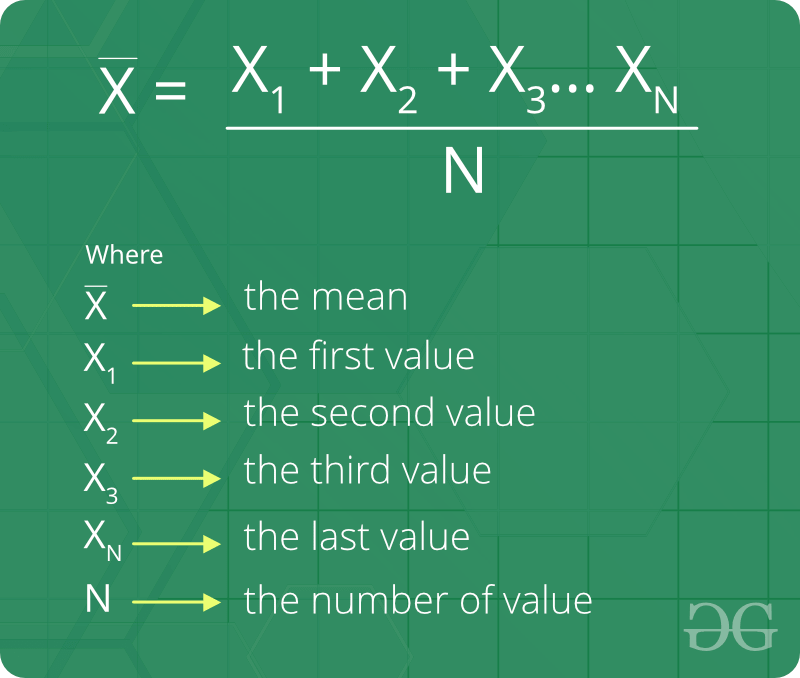

In [6]:
#Lets we assume
X1,X2,X3,X4 = 21,23,35,30 
#Mean = Total Sum/ Number of values
#Number of values (n) = 4
n = 4
Total_sum = X1+X2+X3+X4
Mean = Total_sum/n
print(Mean)

27.25


#### Lets calculate the mean in the data 

In [42]:
# Here I define own function

def Mean(x):
    sum = 0
    for i in x:
        sum+=i
    Mean = sum/len(x)
    return Mean

In [43]:
Mean(Data["Mthly_HH_Income"])

41558.0

In [7]:
Totalsum = Data.iloc[0:,0].sum()            
n = len(Data.iloc[0:,0])
Mean = Totalsum/n                       
print(Mean)

41558.0


In [8]:
Data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [9]:
#Let's calculate the mean with .mean() function 

print(Data.iloc[0:,0].mean())               
print(np.mean(Data.iloc[0:,0]))         


41558.0
41558.0


Note:Here I use `iloc Function` which enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

## 2. Median 

The median of a set of data is the middlemost number or center value in the set. The median is also the number that is halfway into the set.

To find the median, the data should be arranged, first, in order of least to greatest or greatest to the least value. A median is a number that is separated by the higher half of a data sample, a population or a probability distribution, from the lower half. The median is different for different types of distribution.

For Odd Number of observations:
$$Median = \frac{(n+1)}{2}$$

For Even Number of observations:
$$Median = \frac{n}{2}$$

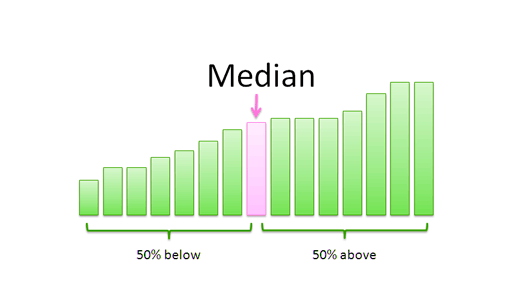

**For example,** 
<p>The median of 3, 3, 5, 9, 11 is 5. 
    <p>If there is an even number of observations, then there is no single middle value; the median is then usually defined to be the mean of the two middle values: 
        <p>so the median of 3, 5, 7, 9 is (5+7)/2 = 6.

#### Let's calculate the median in data

In [51]:
def median(sample):      #Here I define own function 
     n = len(sample)
     index = n // 2
     # Sample with an odd number of observations
     if n % 2:
         return sorted(sample)[index]
     # Sample with an even number of observations
     return sum(sorted(sample)[index - 1:index + 1]) / 2


print(median(Data["Mthly_HH_Income"]))

35000.0


In [58]:
print(Data.iloc[0:,0].median())       #WIth Liberary
print(np.median(Data.iloc[0:,0]))

35000.0
35000.0


## 3. Mode

In statistics, the mode is the value which is repeatedly occurring in a given set. We can also say that the value or number in a data set, which has a high frequency or appears more frequently is called mode or modal value. It is one of the three measures of central tendency, apart from mean and median.

$$Mode = L + \frac{(fm−f1)h} {(fm−f1)+(fm−f2)} $$

Where ;
<p>L = Lower limit Mode of modal class
<p>fm = Frequency of modal class
<p>f1 = Frequency of class preceding the modal class
<p>f2= Frequency of class succeeding the modal class
<p>h = Size of class interval

**Example:** 
    <p>In the given set of data: 2, 4, 5, 5, 6, 7, 
    <p>the mode of the data set is 5 since it has appeared in the set twice.

##### Bimodal, Trimodal & Multimodal

<p>When there are two modes in a data set, then the set is called bimodal
    
**For example**
    <p>The mode of Set A = {2,2,2,3,4,4,5,5,5} is 2 and 5, because both 2 and 5 is repeated three times in the given set.

When there are three modes in a data set, then the set is called trimodal
        
**For example** 
        <p>the mode of set A = {2,2,2,3,4,4,5,5,5,7,8,8,8} is 2, 5 and 8
            

<p>When there are four or more modes in a data set, then the set is called multimodal

#### Lets see the mode in Dataset 

In [57]:
from collections import Counter      #define own functio or without using any liberary

def mode(sample):
     c = Counter(sample)
     return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
print(mode(Data["Mthly_HH_Income"]))

[45000]


In [11]:
print(Data.iloc[0:,0].mode())              #With leberary   

0    45000
dtype: int64


In [12]:
from scipy import stats                #Here I use Scipy Liberary to use mode() function
stats.mode(Data.iloc[0:,0])

ModeResult(mode=array([45000], dtype=int64), count=array([4]))

## 4.Variance

<p>The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean.

<p>Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.

#### Variance vs standard deviation
<p>The standard deviation is derived from variance and tells you, on average, how far each value lies from the mean. It’s the square root of variance.

<p>Both measures reflect variability in a distribution, but their units differ:

* Standard deviation is expressed in the same units as the original values (e.g., meters).
* Variance is expressed in much larger units (e.g., meters squared)

<p>Since the units of variance are much larger than those of a typical value of a data set, it’s harder to interpret the variance number intuitively. That’s why standard deviation is often preferred as a main measure of variability.

<p>However, the variance is more informative about variability than the standard deviation, and it’s used in making statistical inferences.

### Population vs sample variance
Different formulas are used for calculating variance depending on whether you have data from a whole population or a sample.

#### Population variance
When you have collected data from every member of the population that you’re interested in, you can get an exact value for population variance.

Population Variance formula:

$$\sigma^2 = \frac{\sum(X-\mu)^2}{N}$$ 

Where:
<p>$\sigma^2$ = population variance
<p>$\sum$ = sum of…
<p>Χ = each value
<p>$\mu$ = population mean
<p>Ν = number of values in the population

#### Sample variance
When you collect data from a sample, the sample variance is used to make estimates or inferences about the population variance.

Sample Variance Formula:
 
$$S^2=\frac{\sum(X-\bar x)}{n-1}$$


<p>$s^2$ = sample variance
<p>$\sum$ = sum of…
<p>Χ = each value
<p>$\bar x$= sample mean
<p>n = number of values in the sample

<p>With samples, we use n – 1 in the formula because using n would give us a biased estimate that consistently underestimates variability. The sample variance would tend to be lower than the real variance of the population.

<p>Reducing the sample n to n – 1 makes the variance artificially large, giving you an unbiased estimate of variability: it is better to overestimate rather than underestimate variability in samples.

<p>It’s important to note that doing the same thing with the standard deviation formulas doesn’t lead to completely unbiased estimates. Since a square root isn’t a linear operation, like addition or subtraction, the unbiasedness of the sample variance formula doesn’t carry over the sample standard deviation formula.

##### Steps to Finding Variance
* Find a mean of the set of data.
* Subtract each number from a mean.
* Square the result.
* Add the results together.
* Divide a result by the total number of numbers in the data set.

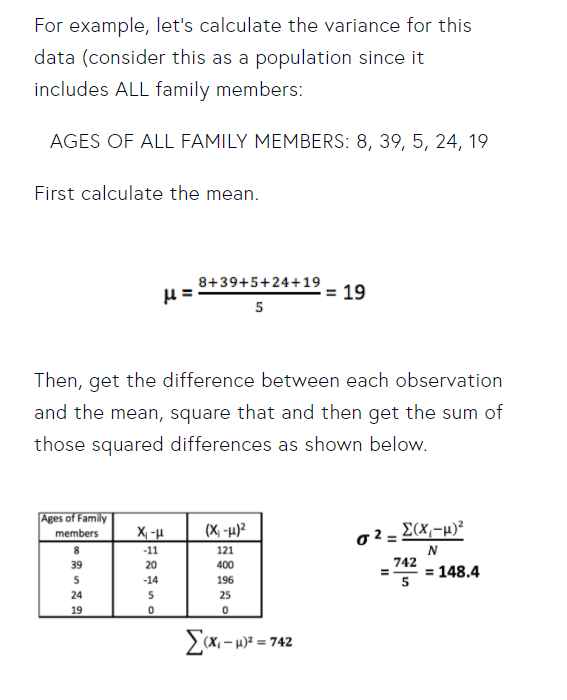

#### Let's find the variance in the Dataset

In [61]:
 def variance(data):                  #without liberary
     # Number of observations
     n = len(data)
     # Mean of the data
     mean = sum(data) / n
     # Square deviations
     deviations = [(x - mean) ** 2 for x in data]
     # Variance
     variance = sum(deviations) / n
     return variance
print(variance(Data["Mthly_HH_Income"]))

667478836.0


In [65]:
#We can refactor our function to make it more concise and efficient
def variance(data, ddof=0):
     n = len(data)
     mean = sum(data) / n
     return sum((x - mean) ** 2 for x in data) / (n - ddof)


print(variance(Data["Mthly_HH_Income"]))

667478836.0


In [14]:
import statistics             #With Liberary
column1 = Data.iloc[0:,0]
statistics.pvariance(column1)

667478836

In [63]:
variance(Data["Mthly_HH_Income"])     #with Libearry

667478836.0

## 5. Standard Deviation

When we have to deal with a whole population, then we use population Standard Deviation:

$$\sigma= \sqrt{\frac{\sum(X-\mu)^2}{n}}$$


where;

<p>$\sigma$ = population standard deviation
<p>$\sum$ = sum of..
<p>$\mu$ = population mean
<p>n = number of score in sample   


When we are asked to find SD of some part of a population, a segment of population; then we use sample Standard Deviation.

$$\mu=\sqrt{\frac{\sum(X-\bar x)^2}{n-1}}$$


<p>$\bar x$ = Sample Mean   
    
 <p>    With samples, we use n – 1 in the formula because using n would give us a biased estimate that consistently underestimates variability. The sample standard deviation would tend to be lower than the real standard deviation of the population.

<p>Reducing the sample n to n – 1 makes the standard deviation artificially large, giving you a conservative estimate of variability.

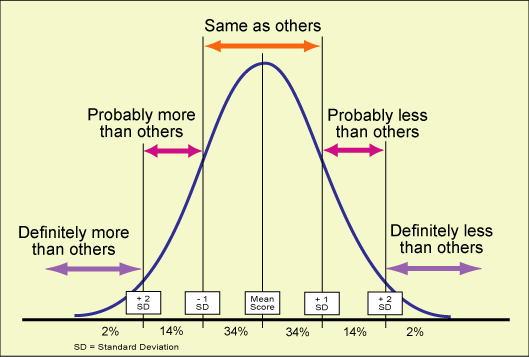

#### Steps for calculating the standard deviation

In [15]:
data_set = {"Age":[25,22,36,20,30,25]}
S_data = pd.DataFrame(data_set)
S_data

,Age
0,25
1,22
2,36
3,20
4,30
5,25


##### Step 1: Finding Mean

In [16]:
X_Bar = (25 + 22 + 36 + 20 + 30 +25) / 6
X_Bar

26.333333333333332

#### Step 2: Find each score’s deviation from the mean

In [17]:
Deviation_from_the_mean = S_data["Age"] - X_Bar
S_data["Deviation"] = Deviation_from_the_mean
S_data

,Age,Deviation
0,25,-1.333333
1,22,-4.333333
2,36,9.666667
3,20,-6.333333
4,30,3.666667
5,25,-1.333333


#### Step 3: Square each deviation from the mean

In [18]:
Square = S_data["Deviation"]**2
S_data["Deviation_square"] = Square
S_data

,Age,Deviation,Deviation_square
0,25,-1.333333,1.777778
1,22,-4.333333,18.777778
2,36,9.666667,93.444444
3,20,-6.333333,40.111111
4,30,3.666667,13.444444
5,25,-1.333333,1.777778


#### Step 4: Find the sum of squares

In [19]:
sum_of_square = 1.77+18.77+93.44+40.11+13.44+1.77
sum_of_square 

169.29999999999998

#### Step 5: Find the variance

In [20]:
#Since we’re working with a sample size of 6, we will use  n – 1, where n = 6.

Variance = 169.29/(6-1)
Variance

33.858

#### Step 6: Find the square root of the variance

In [21]:
print(Variance**(1/2))      #without using liberary

import math
print(math.sqrt(Variance))     #with liberary

5.818762755088061
5.818762755088061


#### Lets see the data standard deviation

In [69]:
import math 

 # Here I define variance then define the standard deviation
def variance(data, ddof=0):
     n = len(data)
     mean = sum(data) / n
     return sum((x - mean) ** 2 for x in data) / (n - ddof)
def stdev(data):
     var = variance(data)
     std_dev = math.sqrt(var)
     return std_dev
print(stdev(Data["Mthly_HH_Income"]))    

25835.611779092826


In [73]:
print(stdev(Data["Mthly_HH_Expense"]))   

11968.704023410388


In [70]:
import statistics                            #Using Liberary
statistics.pstdev(Data["Mthly_HH_Income"])

25835.611779092826

In [22]:
Data.std(axis = 0, skipna = True) #Here axis= 0 means I take rows

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

## 6 Correlation

<p>Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  
    <p>In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  
        <p>A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship. 
            <p>Usually, in statistics, we measure four types of correlations: Pearson correlation, Kendall rank correlation, Spearman correlation, and the Point-Biserial correlation.  The software below allows you to very easily conduct a correlation.

<p>Pearson r correlation: Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables. 
    
    For example,
    
    in the stock market, if we want to measure how two stocks are related to each other, Pearson r correlation is used to measure the degree of relationship between the two. The point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous. The following formula is used to calculate the Pearson r correlation:
    
    
    
$$ r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}} $$
    
<p> r = correaltion coefficient
<p> $x_i$ = value of the x-variable in sample
<p> $\bar x$ = mean of the values of the x-variable
<p> $y_i$ = values of the y-variable in a sample 
<p> $\bar y$ = mean of the values of the y-variabl
    
   <p> The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation.

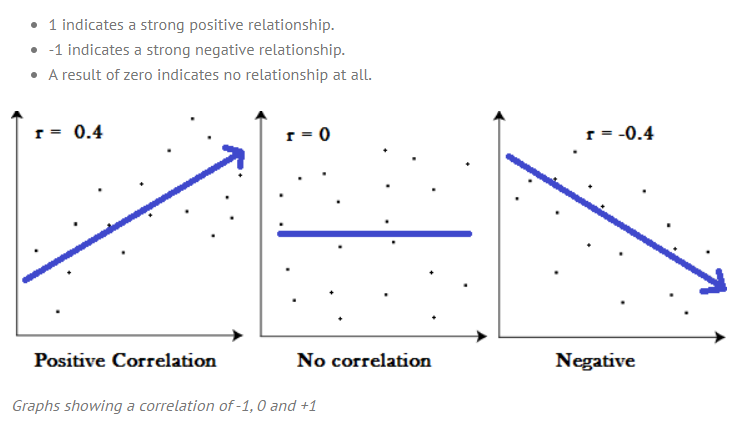

### Let's see the correlation in the data

In [24]:
Data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [81]:
from scipy.stats import pearsonr, spearmanr
pearsonr(Data["Mthly_HH_Income"], Data["Mthly_HH_Expense"])

(0.6492152549316461, 3.396855982145655e-07)

In [82]:
spearmanr(Data["Mthly_HH_Income"], Data["Mthly_HH_Expense"])

SpearmanrResult(correlation=0.6382390731353906, pvalue=6.157301387937072e-07)

In [27]:
Data.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


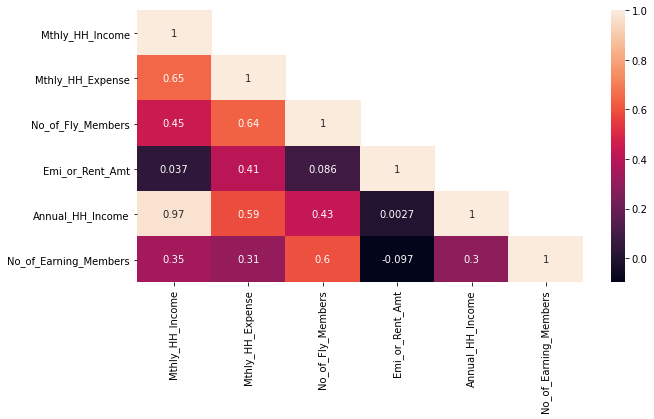

In [28]:
plt.figure(figsize =(10,5))
mask = np.array(Data.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(Data.corr(), mask = mask, annot =True)
plt.show()

## 7 Normal Distribution

$$ F(x) =\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}\right)$$

<p>$f(x)$ = probability density function
<p>$\sigma$ = standard deviation
<p>$\mu$ = mean
<p>$\sigma$ = Standard Deviation  
<p> e = Exponential constant = 2.718
<p> x = distance along the horizontal axis
<p> y = vertical height of a point on the normal distribution    

<p> It is a statistic that tells you how closely all of the examples are gathered around the mean in a data set.  
 <p>The shape of a normal distribution is determined by the mean and the standard deviation. The steeper the bell curve, the smaller the standard deviation. 
 <p>If the examples are spread far apart, the bell curve will be much flatter, meaning the standard deviation is large. 

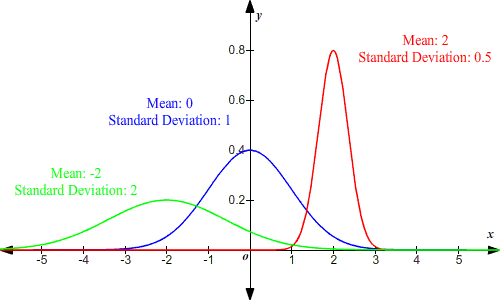

<p>In general, about 68% of the area under a normal distribution curve lies within one standard deviation of the mean.

<p>That is, if x¯ is the mean and σ is the standard deviation of the distribution, then 68% of the values fall in the range between (x¯−σ) and (x¯+σ) . In the figure below, this corresponds to the region shaded pink.



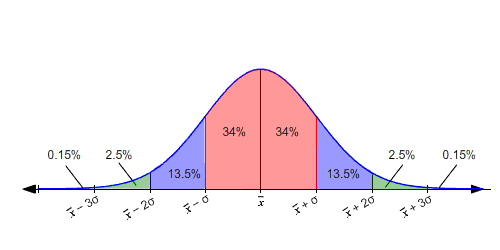

<p>About 95% of the values lie within two standard deviations of the mean, that is, between (x¯−2σ) and (x¯+2σ) .

<p>(In the figure, this is the sum of the pink and blue regions: 34%+34%+13.5%+13.5%=95% .)

<p>About 99.7% of the values lie within three standard deviations of the mean, that is, between (x¯−3σ) and (x¯+3σ) .
(The pink, blue, and green regions in the figure.)

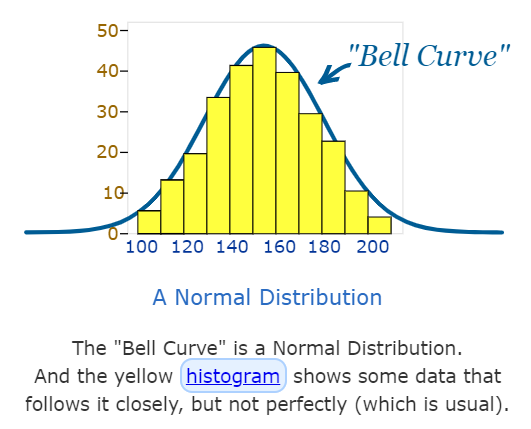

<p>We say the data is "normally distributed":

<p>normal distribution with mean median mode at center
The Normal Distribution has:

<p>mean = median = mode
<p>symmetry about the center
50% of values less than the mean
and 50% greater than the mean

**Example :**

<p>A town has 330,000 adults. Their heights are normally distributed with a mean of 175 cm and a variance of 100 cm 2 .How many people would you expect to be taller than 205 cm?

<p>The variance of the data set is given to be 100 cm 2 . So, the standard deviation is 100−−−√ or 10 cm.

<p>Now, 175+3(10)=205 , so the number of people taller than 205 cm corresponds to the subset of data which lies more than 3 standard deviations above the mean.

<p>The graph above shows that this represents about 0.15% of the data. However, this percentage is approximate, and in this case, we need more precision. The actual percentage, correct to 4 decimal places, is 0.1318% .

<p>330,000×0.001318≈435

<p>So, there will be about 435 people in the town taller than 205 cm.

## 8 Features of Normal distribution

### 1. It is symmetric
A normal distribution comes with a perfectly symmetrical shape. This means that the distribution curve can be divided in the middle to produce two equal halves. The symmetric shape occurs when one-half of the observations fall on each side of the curve.

### 2. The mean, median, and mode are equal
The middle point of a normal distribution is the point with the maximum frequency, which means that it possesses the most observations of the variable. The midpoint is also the point where these three measures fall. The measures are usually equal in a perfectly (normal) distribution.

### 3. Empirical rule
In normally distributed data, there is a constant proportion of distance lying under the curve between the mean and specific number of standard deviations from the mean. For example, 68.25% of all cases fall within +/- one standard deviation from the mean. 95% of all cases fall within +/- two standard deviations from the mean, while 99% of all cases fall within +/- three standard deviations from the mean.

### 4. Skewness and kurtosis
Skewness and kurtosis are coefficients that measure how different a distribution is from a normal distribution. Skewness measures the symmetry of a normal distribution while kurtosis measures the thickness of the tail ends relative to the tails of a normal distribution.

## 9.Positively Skewed & Negatively Skewed Normal Distribution

<p>A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

<p>A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

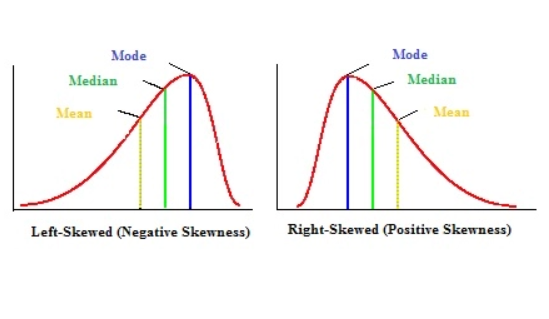

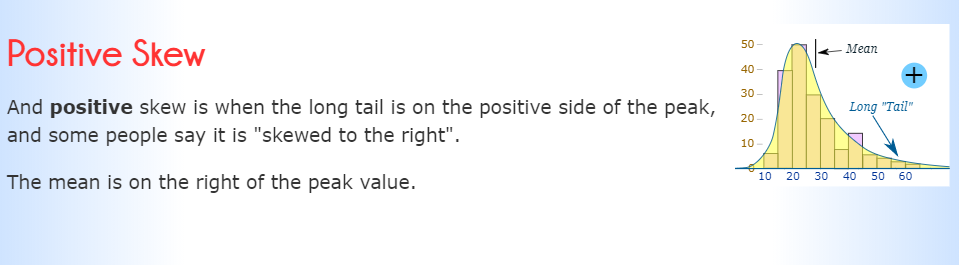


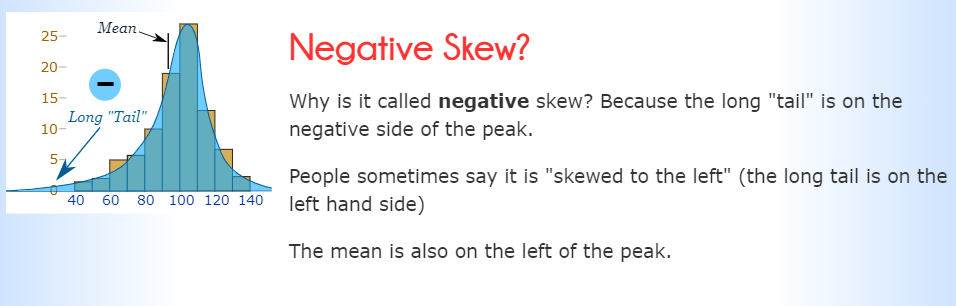

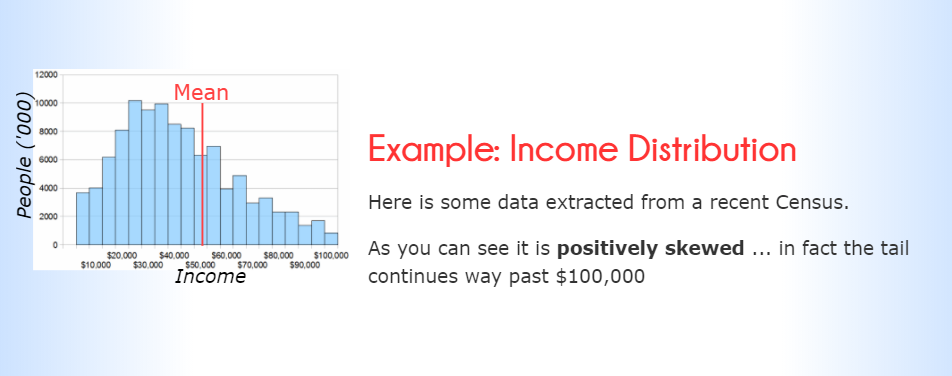

### Let's look into the data 

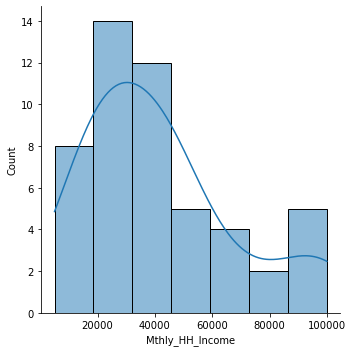

In [29]:
sns.displot(data=Data, x="Mthly_HH_Income", kde=True)
plt.show()


Here we can see that the column Mthly_HH_Income in data is positively skewed

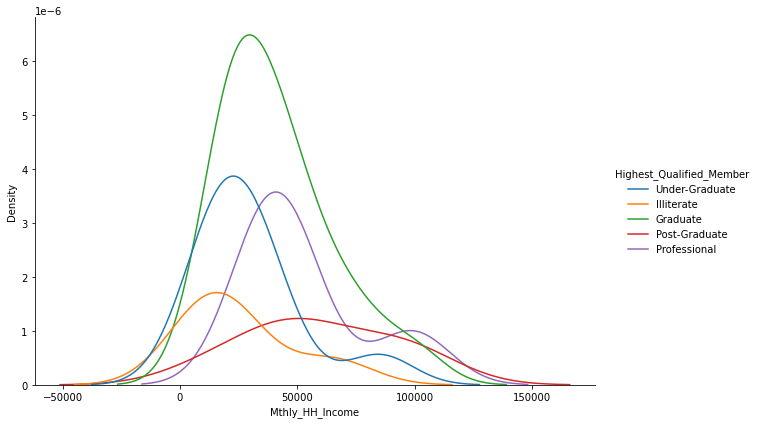

In [30]:
sns.displot(data=Data, x="Mthly_HH_Income", hue="Highest_Qualified_Member", height=6, aspect=10/7, kind="kde")
plt.show()

## 10. Effect on Mean, Median and Mode due to Skewness

<P>If the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.
<p>However, as the data becomes skewed the mean loses its ability to provide the best central location for the data because the skewed data is dragging it away from the typical value. However, the median best retains this position and is not as strongly influenced by the skewed values    

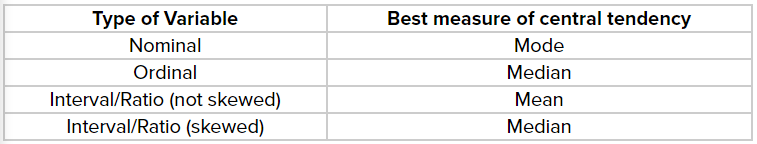

In [136]:
#Lets consider dataset
Dataset = {"Dataset":[4,6,6,6,7,7,7,7,7,7,8,8,8,9,10]}
Dataset = pd.DataFrame(Dataset)

This data set can be represented by following histogram. Each interval has width one, and each value is located in the middle of an interval.

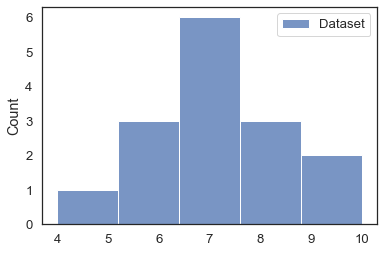

In [139]:
sns.histplot(data=Dataset,)
plt.show()

<p>The histogram displays a symmetrical distribution of data. A distribution is symmetrical if a vertical line can be drawn at some point in the histogram such that the shape to the left and the right of the vertical line are mirror images of each other. The mean, the median, and the mode are each seven for these data. In a perfectly symmetrical distribution, the mean and the median are the same. This example has one mode (unimodal), and the mode is the same as the mean and median. In a symmetrical distribution that has two modes (bimodal), the two modes would be different from the mean and median.



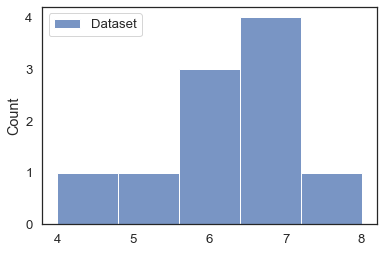

Mean is: Dataset    6.3
dtype: float64
Median is: Dataset    6.5
dtype: float64
Mode is:    Dataset
0        7


In [153]:
Dataset1 = {"Dataset":[4,5,6,6,6,7,7,7,7,8]}
Dataset1 = pd.DataFrame(Dataset1)
sns.histplot(data=Dataset1,)
plt.show()
print("Mean is:" ,Dataset1.mean())
print("Median is:",Dataset1.median())
print("Mode is:",Dataset1.mode())

The mean is 
6.3
, the median is 
6.5
, and the mode is seven. Notice that the mean is less than the median, and they are both less than the mode. The mean and the median both reflect the skewing, but the mean reflects it more so.

<p>The histogram for the dataset1: 
<p>$[4,5,6,6,6,7,7,7,7,8]$  is not symmetrical. 
 <p>The right-hand side seems “chopped off” compared to the left side. A distribution of this type is called skewed to the left because it is pulled out to the left.

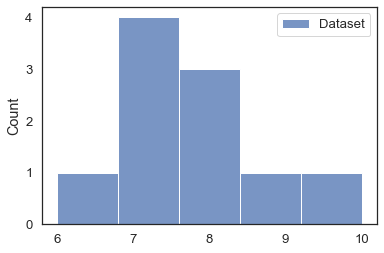

Mean is: Dataset    7.7
dtype: float64
Median is: Dataset    7.5
dtype: float64
Mode is:    Dataset
0        7


In [154]:
Dataset2 = {"Dataset":[6,7,7,7,7,8,8,8,9,10]}
Dataset2 = pd.DataFrame(Dataset2)
sns.histplot(data=Dataset2,)
plt.show()
print("Mean is:" ,Dataset2.mean())
print("Median is:",Dataset2.median())
print("Mode is:",Dataset2.mode())

The mean is 
7.7
, the median is 
7.5
, and the mode is seven. Of the three statistics, the mean is the largest, while the mode is the smallest. Again, the mean reflects the skewing the most.

To summarize, generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

Skewness and symmetry become important when we discuss probability distributions

#### Lets look into Data

In [31]:
Data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


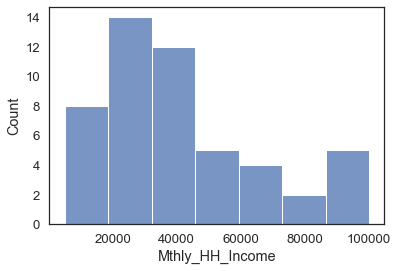

41558.0
35000.0
0    45000
dtype: int64


In [157]:
sns.histplot(data=Data["Mthly_HH_Income"])
plt.show()
print(Data["Mthly_HH_Income"].mean())
print(Data["Mthly_HH_Income"].median())
print((Data["Mthly_HH_Income"].mode()))

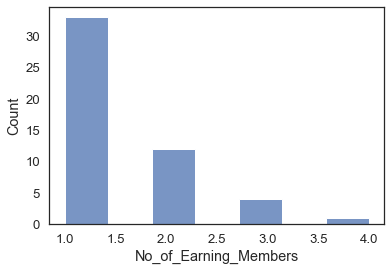

1.46
1.0
0    1
dtype: int64


In [162]:
sns.histplot(data=Data["No_of_Earning_Members"])
plt.show()
print(Data["No_of_Earning_Members"].mean())
print(Data["No_of_Earning_Members"].median())
print((Data["No_of_Earning_Members"].mode()))

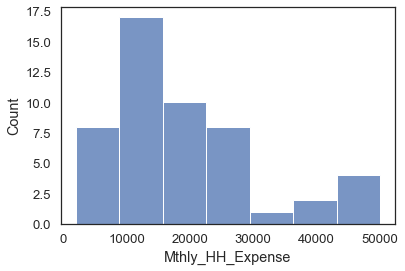

18818.0
15500.0
0    25000
dtype: int64


In [164]:
sns.histplot(data=Data["Mthly_HH_Expense"])
plt.show()
print(Data["Mthly_HH_Expense"].mean())
print(Data["Mthly_HH_Expense"].median())
print((Data["Mthly_HH_Expense"].mode()))

In [33]:
Data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## 11 Quantile Quantile plots

The quantile-quantile plot is a graphical method for determining whether two samples of data came from the same population or not. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. 

For the reference purpose, a 45% line is also plotted, if the samples are from the same population then the points are along this line.

### Usage:
The Quantile-Quantile plot is used for the following purpose:

* Determine whether two samples are from the same population.
* Whether two samples have the same tail
* Whether two samples have the same distribution shape.
* Whether two samples have common location behavior.

### How to Draw Q-Q plot
* Collect the data for plotting the quantile-quantile plot.
* Sort the data in ascending or descending order.
* Draw a normal distribution curve.
* Find the z-value (cut-off point) for each segment.
* Plot the dataset values against the normalizing cut-off points.

### Advantages of Q-Q plot
* Since Q-Q plot is like probability plot. So, while comparing two datasets the sample size need not to be equal.
* Since we need to normalize the dataset, so we don’t need to care about the dimensions of values.

### Types of Q-Q plots
* For Left-tailed distribution: 

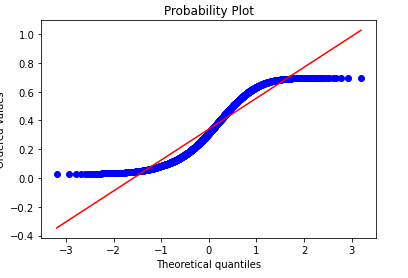

* For the uniform distribution: Below is the q-q plot distribution for uniform distribution:

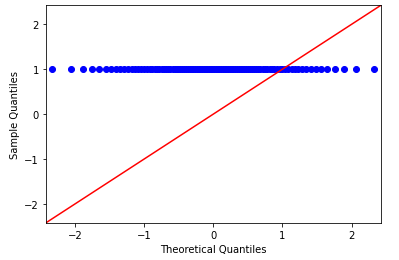

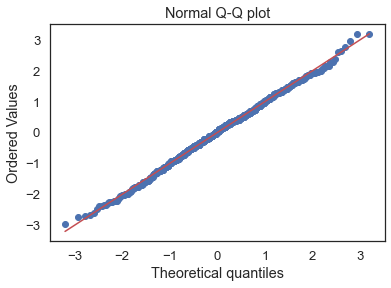

In [165]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  
n = 2000
observation = np.random.binomial(n, 0.53, size=1000)/n
  
z = (observation-np.mean(observation))/np.std(observation)
  
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

#### Let's see Q-Q plot in data

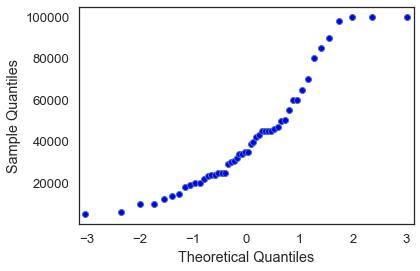

In [169]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(Data["Mthly_HH_Income"], stats.t, distargs=(4,))
plt.show()

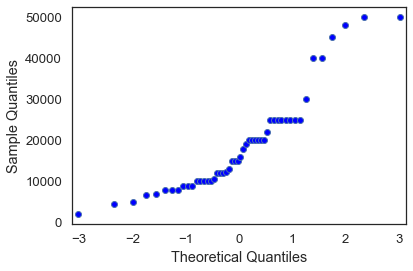

In [170]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(Data["Mthly_HH_Expense"], stats.t, distargs=(4,))
plt.show()

## 12 Box Cox

<p>When performing a linear fit of Y against X, an appropriate transformation of X can often significantly improve the fit. The Box-Cox transformation (Box and Cox, 1964) is a particularly useful family of transformations. It is defined as:
$$T(X)=\frac{(X^\lambda−1)}{\lambda}$$
<p>where X is the variable being transformed and λ is the transformation parameter. For λ = 0, the natural log of the data is taken instead of using the above formula.
<p>The Box-Cox linearity plot is a plot of the correlation between Y and the transformed X for given values of λ. That is, λ is the coordinate for the horizontal axis variable and the value of the correlation between Y and the transformed X is the coordinate for the vertical axis of the plot. The value of λ corresponding to the maximum correlation (or minimum for negative correlation) on the plot is then the optimal choice for λ.

<p>Transforming X is used to improve the fit. The Box-Cox transformation applied to Y can be used as the basis for meeting the error assumptions. That case is not covered here. See page 225 of (Draper and Smith, 1981) or page 77 of (Ryan, 1997) for a discussion of this case.

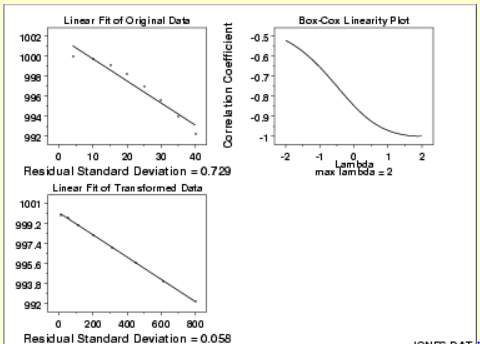

The plot of the original data with the predicted values from a linear fit indicate that a quadratic fit might be preferable. The Box-Cox linearity plot shows a value of λ = 2.0. The plot of the transformed data with the predicted values from a linear fit with the transformed data shows a better fit (verified by the significant reduction in the residual standard deviation).

### Definition
**Box-Cox linearity plots are formed by**
* Vertical axis: Correlation coefficient from the transformed X and Y
* Horizontal axis: Value for λ

### Questions
The Box-Cox linearity plot can provide answers to the following questions:
1. Would a suitable transformation improve my fit?
2. What is the optimal value of the transformation parameter?

Transformations can often significantly improve a fit. The Box-Cox linearity plot provides a convenient way to find a suitable transformation without engaging in a lot of trial and error fitting.

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.2536097616309128


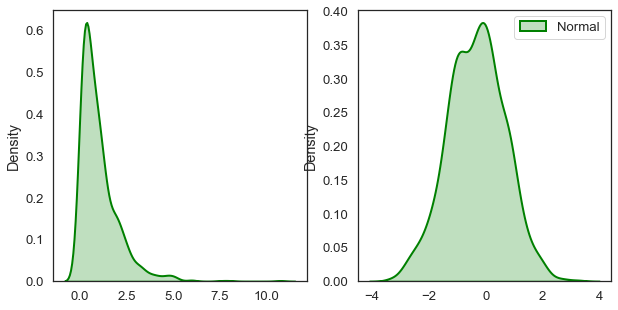

In [173]:
# import modules
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

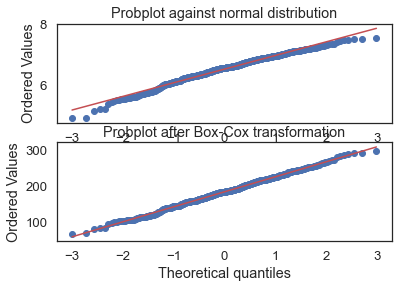

In [176]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

In [178]:
stats.boxcox(Data["Mthly_HH_Income"])

(array([ 40.31831648,  42.79683339,  50.5170921 ,  50.5170921 ,
         54.28331821,  56.29587859,  57.55538753,  61.01339013,
         62.0761407 ,  63.10059552,  63.10059552,  65.04699726,
         66.33720359,  66.87370106,  66.87370106,  67.74745911,
         67.74745911,  67.74745911,  71.01695067,  71.78461975,
         72.16178108,  73.26802005,  74.68814484,  74.68814484,
         75.37645286,  75.37645286,  78.0000836 ,  78.62643549,
         79.84712626,  80.44232498,  81.60438084,  81.60438084,
         81.60438084,  81.60438084,  82.17194858,  82.73098204,
         84.35985154,  84.62465737,  86.92943718,  89.3410009 ,
         89.3410009 ,  91.61630242,  93.77269407,  97.7826036 ,
         99.65741298, 101.45686676, 104.19629334, 104.85663515,
        104.85663515, 104.85663515]),
 0.3031376789702236)

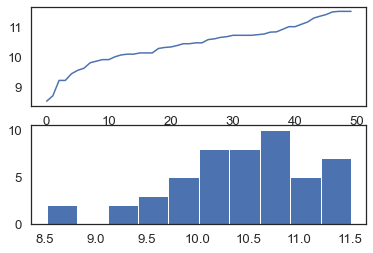

In [179]:
from scipy.stats import boxcox
from matplotlib import pyplot


Data['Mthly_HH_Income'] = boxcox(Data['Mthly_HH_Income'], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(Data['Mthly_HH_Income'])
# histogram
pyplot.subplot(212)
pyplot.hist(Data['Mthly_HH_Income'])
pyplot.show()

<p>The square root transform and log transform belong to a class of transforms called power transforms.

<p>The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

<p>More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it.

<p>The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function takes an argument, called lambda, that controls the type of transform to perform.

<p>Below are some common values for lambda

* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

Lambda: 4.035562


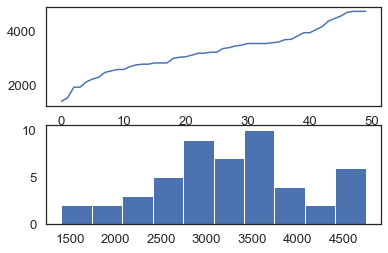

In [180]:
Data['Mthly_HH_Income'], lam = boxcox(Data['Mthly_HH_Income'])

print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(Data['Mthly_HH_Income'])
# histogram
pyplot.subplot(212)
pyplot.hist(Data['Mthly_HH_Income'])
pyplot.show()

<p>Running the example discovers the lambda value of 0.148023.

<p>We can see that this is very close to a lambda value of 0.0, resulting in a log transform and stronger (less than) than 0.5 for the square root transform.

$$END$$